In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load CSV (adjust file name as needed)
df = pd.read_csv('Housing.csv')

# Show first few rows
print(df.head())


      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [4]:
# Drop rows with missing values
df.dropna(subset=['area', 'price'], inplace=True)

# Keep only area and price columns
df = df[['area', 'price']]

print(df.head())


   area     price
0  7420  13300000
1  8960  12250000
2  9960  12250000
3  7500  12215000
4  7420  11410000


In [5]:
X = df[['area']]  
y = df['price']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1474748.1337969352
MSE: 3675286604768.185
R² Score: 0.27287851871974644


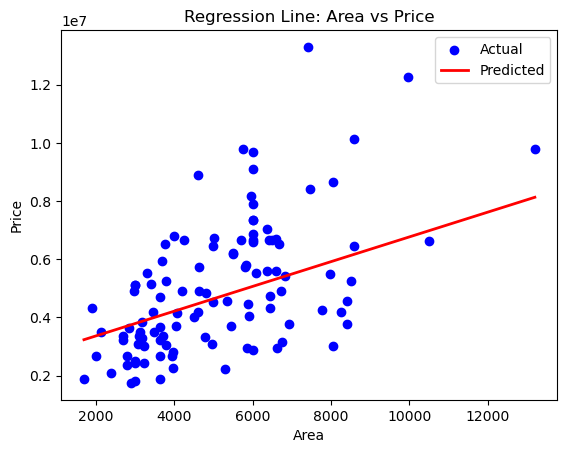

In [8]:
# Sort X_test by area to draw smooth line
sorted_idx = X_test['area'].values.argsort()
area_sorted = X_test['area'].values[sorted_idx]
y_pred_sorted = y_pred[sorted_idx]

# Plotting
plt.scatter(X_test['area'], y_test, color='blue', label='Actual')
plt.plot(area_sorted, y_pred_sorted, color='red', linewidth=2, label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Regression Line: Area vs Price')
plt.legend()
plt.show()


In [9]:
print("Intercept:", model.intercept_)
print("Slope (coefficient):", model.coef_[0])


Intercept: 2512254.2639593435
Slope (coefficient): 425.72984193878284
